In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

import sys
print(sys.version)

3.9.12 (main, Mar 24 2022, 13:02:21) 
[GCC 11.2.0]


In [2]:
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y=True)

from sklearn.decomposition import PCA
pca = PCA(2)
U = pca.fit_transform(X)
U = np.c_[U[:,1], U[:,0]]
U = np.ascontiguousarray(U)
Y = np.zeros(150, 'd')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


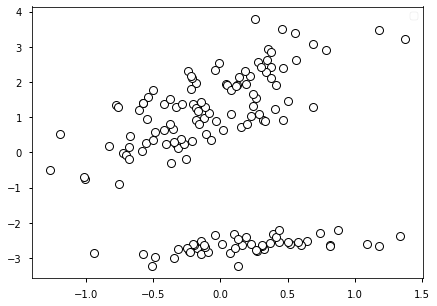

In [3]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(U[:,0], U[:,1], s=64, c='w', edgecolors='k', linewidth=1.0)
plt.legend()
# plt.savefig('fig/duncan_income_education.eps')
plt.show()

In [4]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.weights as ml_weights
import mlgrad.func as ml_func
import mlgrad.af as ml_af
import mlgrad.gd as ml_gd

In [5]:
layer = ml_model.GeneralModelLayer(1)
linmod1 = ml_model.TLinearModel(1)
linmod2 = ml_model.TLinearModel(1)
# linmod3 = ml_model.TLinearModel(1)
layer.append(linmod1)
layer.append(linmod2)
# layer.append(linmod3)
nn = ml_model.FFNetworkModel()
nn.add(layer)

nn.allocate()
nn.init_param()


In [6]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.Square()), 2, a=15)
risk = ml_risk.ER21(U, Y, nn, minloss)

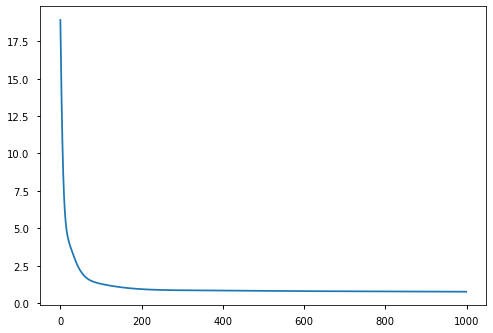

In [7]:
alg = mlgrad.erm_fg(risk, n_restart=1, h=0.1)

plt.plot(alg.lvals)
plt.show()

In [8]:
print(np.array(linmod1.param))
print(np.array(linmod2.param))
# print(np.array(linmod3.param))
alg.K

[ -5.33763443 -15.77739703]
[-3.8381338  10.66203011]


1000

In [9]:
o_linmod1 = linmod1.as_linearmodel() 
o_linmod2 = linmod2.as_linearmodel() 
# o_linmod3 = linmod3.as_linearmodel()

In [10]:
print(np.array(o_linmod1.param))
print(np.array(o_linmod2.param))

[ -5.33763443 -15.77739703]
[-3.8381338  10.66203011]


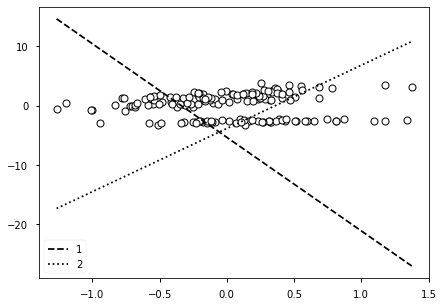

In [11]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(U[:,0], U[:,1], s=49, c='w', edgecolors='k', linewidth=1.0)
urange = np.array([U[:,0].min(), U[:,0].max()])
urange_s = urange.reshape(-1,1)
plt.plot(urange, o_linmod1.evaluate_all(urange_s), linestyle='--', label='1', color='k')
plt.plot(urange, o_linmod2.evaluate_all(urange_s), linestyle=':', label='2', color='k')
# plt.plot(urange, o_linmod3.evaluate_all(urange_s), linestyle='-.', label='2', color='k')
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

In [12]:
layer_rob = ml_model.GeneralModelLayer(1)
rob_linmod1 = ml_model.TLinearModel(1)
rob_linmod2 = ml_model.TLinearModel(1)
layer_rob.append(rob_linmod1)
layer_rob.append(rob_linmod2)
nn_rob = ml_model.FFNetworkModel()
nn_rob.add(layer_rob)

nn_rob.allocate()
nn_rob.init_param()


In [13]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.Square()), 2, a=15)
rob_risk = ml_risk.ER21(U, Y, nn_rob, minloss)
agg_func = ml_af.averaging_function("WM", alpha=0.95)
weights_tone = ml_weights.MWeights(agg_func, rob_risk)

20.430526467362295


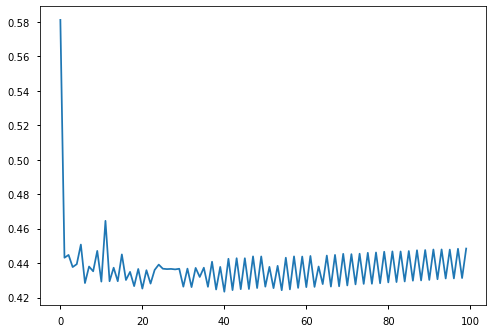

In [14]:
fg_tone = mlgrad.fg(rob_risk, h=0.1)
rob_alg = mlgrad.erm_irgd(fg_tone, weights_tone)

plt.plot(rob_alg.lvals)
plt.show()

In [15]:
o_rob_linmod1 = rob_linmod1.as_linearmodel()
o_rob_linmod2 = rob_linmod2.as_linearmodel()
# o_rob_linmod3 = rob_linmod3.as_linearmodel()

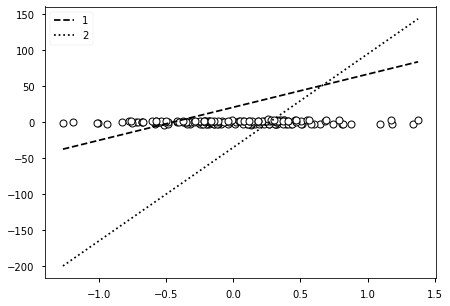

In [16]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(U[:,0], U[:,1], s=49, c='w', edgecolors='k', linewidth=1.0)
urange = np.array([U[:,0].min(), U[:,0].max()])
urange_s = urange.reshape(-1,1)
plt.plot(urange, o_rob_linmod1.evaluate_all(urange_s), linestyle='--', label='1', color='k')
plt.plot(urange, o_rob_linmod2.evaluate_all(urange_s), linestyle=':', label='2', color='k')
# plt.plot(urange, o_linmod3.evaluate_all(urange_s), linestyle='-.', label='2', color='k')
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

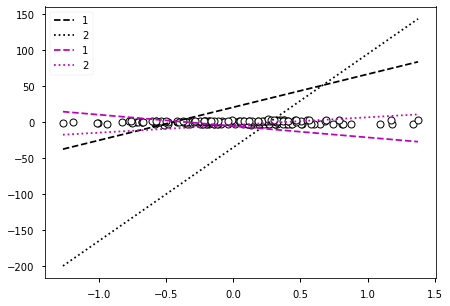

In [17]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(U[:,0], U[:,1], s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot(urange, o_rob_linmod1.evaluate_all(urange_s), linestyle='--', label='1', color='k')
plt.plot(urange, o_rob_linmod2.evaluate_all(urange_s), linestyle=':', label='2', color='k')
plt.plot(urange, o_linmod1.evaluate_all(urange_s), linestyle='--', label='1', color='m')
plt.plot(urange, o_linmod2.evaluate_all(urange_s), linestyle=':', label='2', color='m')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
# plt.xlabel('Фактическое соотношение тонов')
# plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

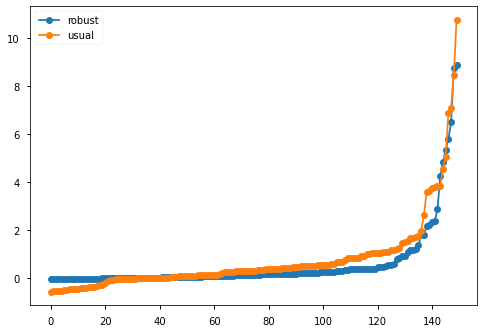

In [18]:
plt.plot(sorted(rob_risk.evaluate_losses()), marker='o', label='robust')
plt.plot(sorted(risk.evaluate_losses()), marker='o', label='usual')
plt.legend()
plt.show()